# NATS3200: Practical 4 (Multiple linear regression and model selection, weeks 4 and 5) 

### Predicting the Olympic Games 

The Olympic Games have always mixed pure sporting spectacle with national competition. During the Cold
War the USA and the Soviet Union competed fiercely to win the most medals in each games. On a somewhat
milder level, in Britain we often compare our medal count with that of Australia, one of our traditional
sporting rivals. If you were in the UK during the summers of 2012 and 2016 you cannot have missed the
excitement caused by the UK’s success relative to previous years.
Figure

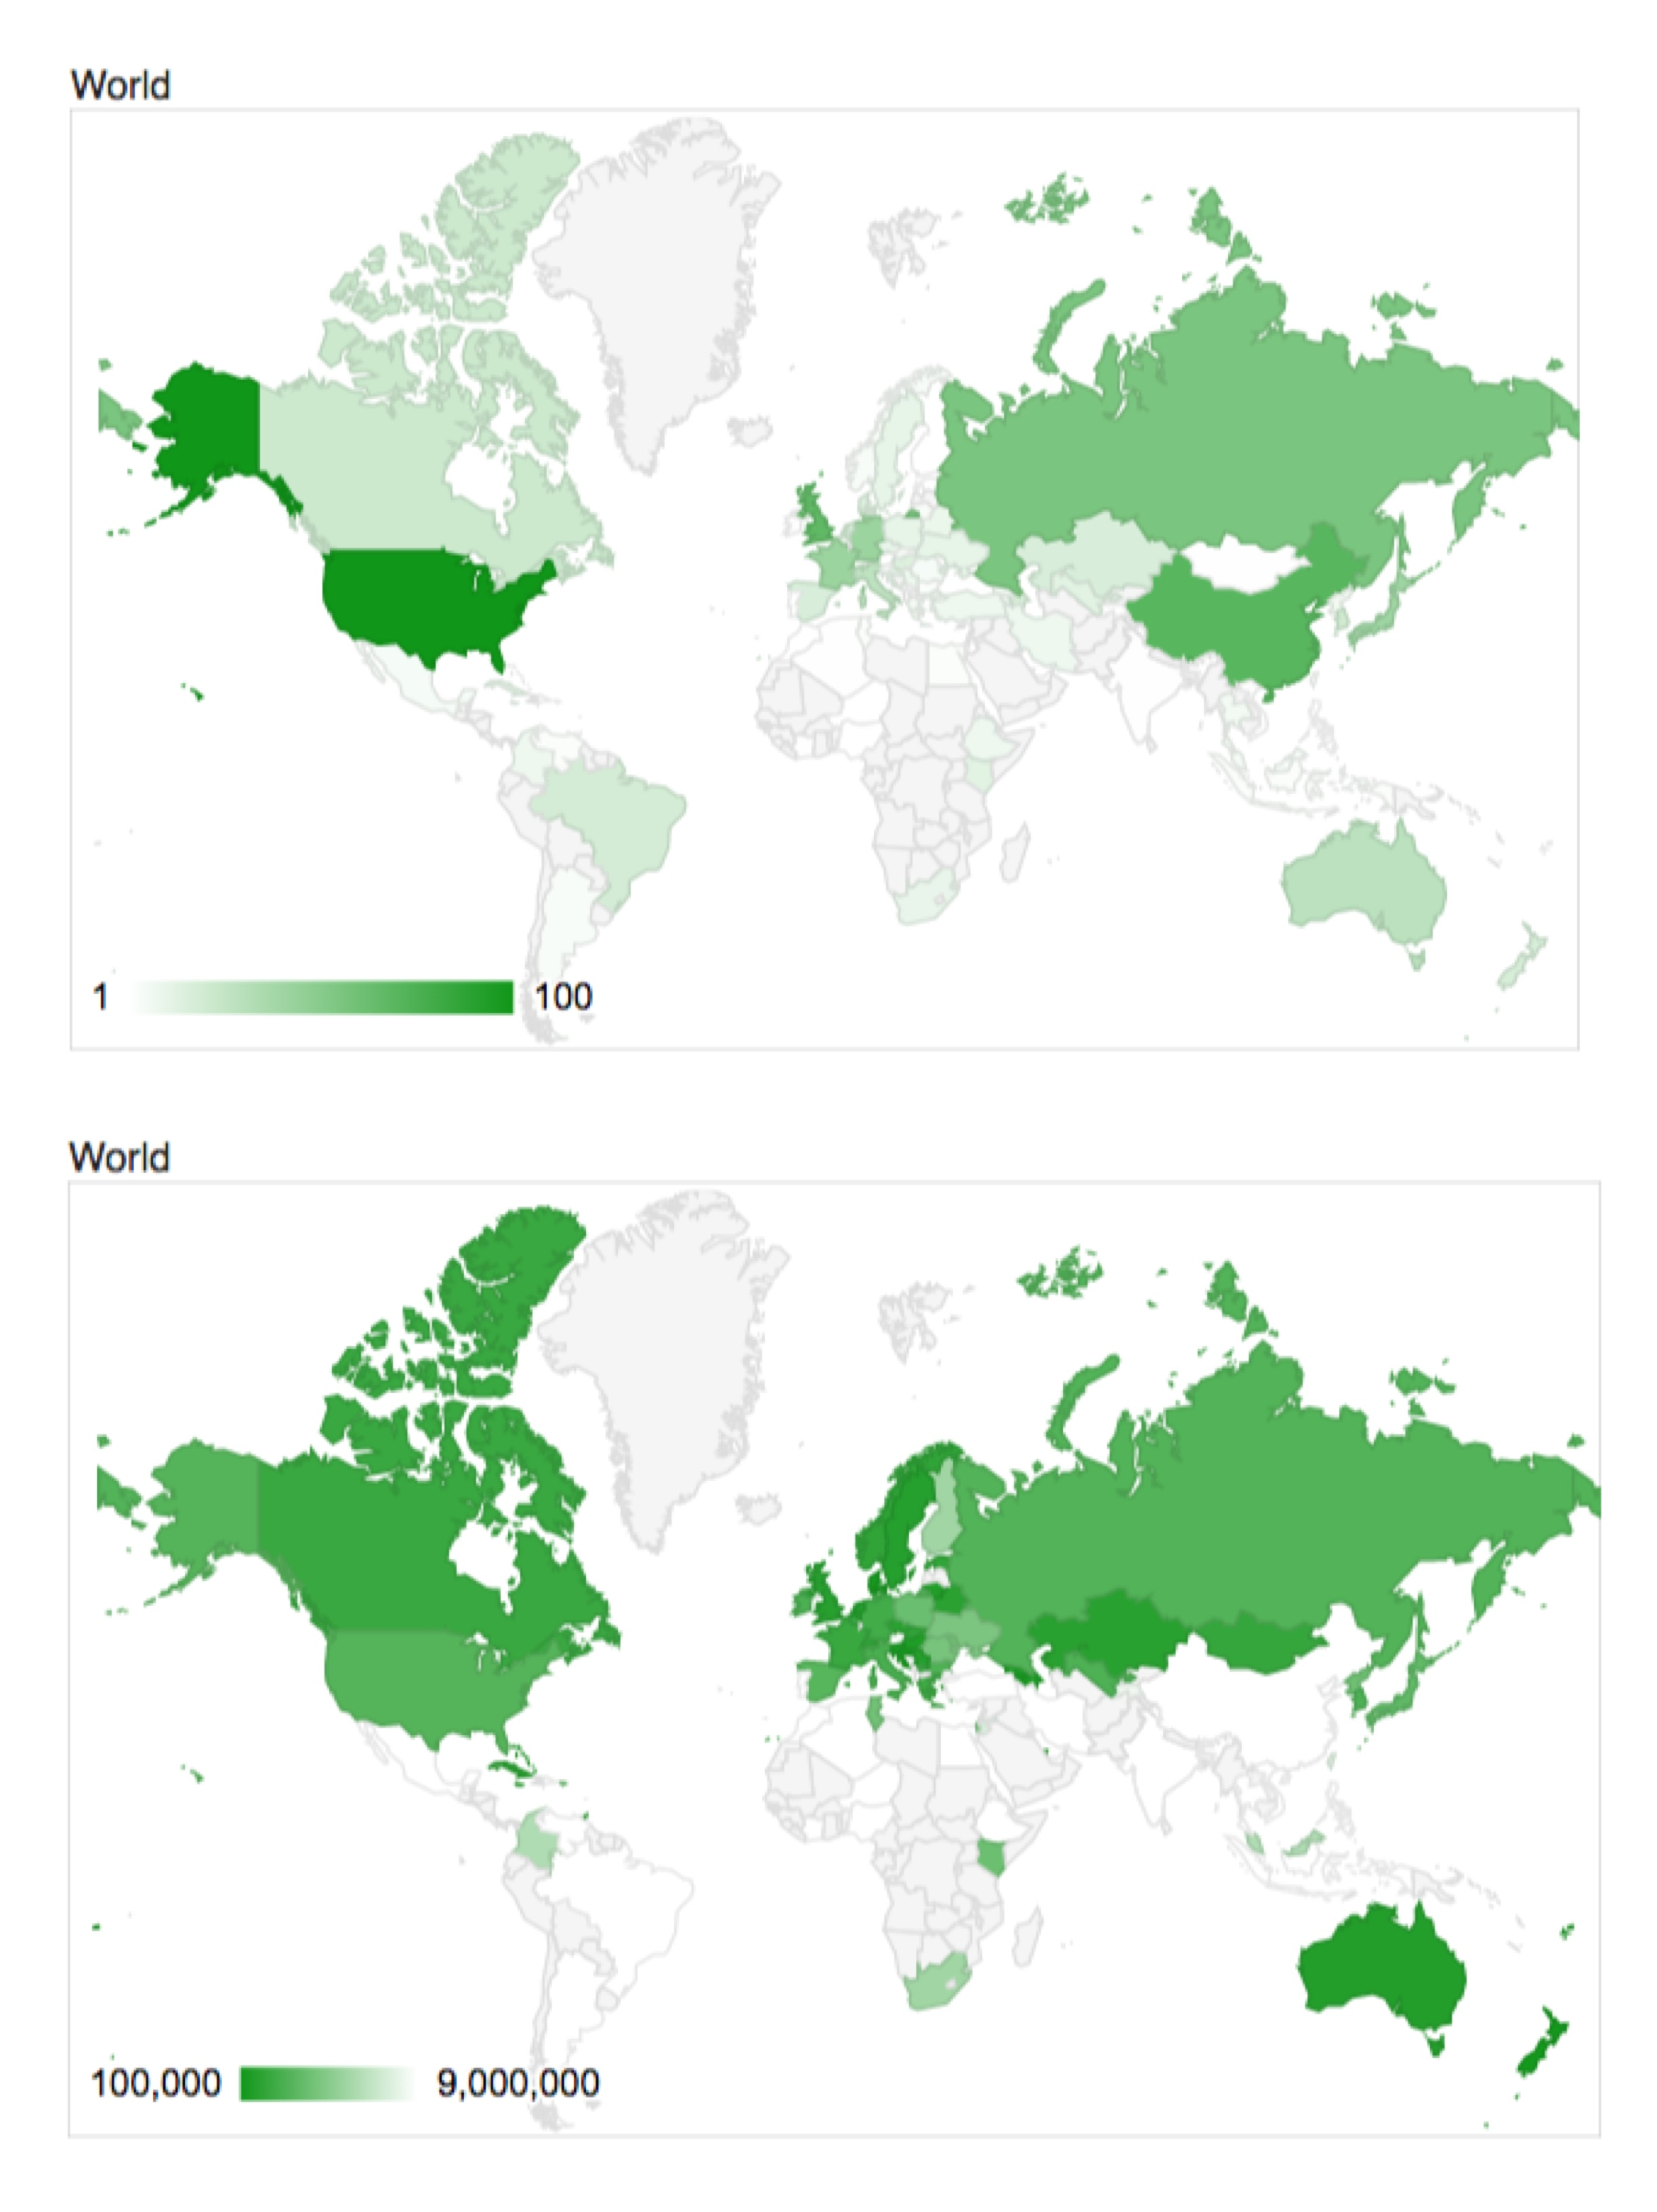
Figure 1: Total medals per country (top) and medals per capita (bottom) in the Rio 2016 Olympic Games
(credit: http://www.medalspercapita.com/)

This competition is usually expressed in terms of the number of medals won by each country’s athletes
((Figure 1 top panel). However, many interested watchers, especially those from smaller countries, have
pointed out that the medal table is hardly a fair reflection of a country’s sporting prowess. Some countries
have a strong tradition of sporting excellence, but are simply too small to make an impact in terms of total
medals. These commentators would rather look at the per capita medal count (Figure 1 bottom panel).

Looking at the per capita map above though, we see that large areas of the world are still very underrepresented.
Specifically, poorer countries do not win many medals per head of population. There are many
reasons for this, including a lack of investment in sport and facilities, and fewer individuals who are wealthy
enough to devote their life to training. As such, it has been suggested that we should compensate for wealth
when measuring a country’s Olympic performance.
In this practical you will investigate how the number of medals a country wins can be predicted from national
population and GDP, and how consistent these relationships are. This practical will run over this week and
the next.
Begin by downloading the data file medals.csv from MINERVA
This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

* Country name (as recognised by the IOC)
* Population
* GDP (in billions of US dollars)
* Medals won in Beijing 2008, London 2012 and Rio 2016

**Tasks (Regression, week 4):**

0. Depict the data in graph(s), what can you learn by visual inspection? (0.5)
1. Perform a linear regression to predict the medal count in 2008 and 2012 from Population and GDP combined,
   and report your results. (Reporting your results does not just mean to show the summary of GLM). Explain your results,
   What is the meaning of the coefficients you obtain?, and so on (1 mark)
3. Considering your results from tasks 2, how consistent are the effects of Population and GDP over time? (0.5 mark)
4. Using the regression for the 2012 medal count make a prediction for the results of 2016. (0.5 mark)
5. Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation
of the axes to make it these clearer. How good are the predictions? Which countries are outliers from
the trend? (1 mark)

**Tasks (Model Selection, week 5):**

5. Fit linear regressions models for the total medal count in 2012 using: (i) Population alone; (ii) GDP
alone; (iii) Population and GDP combined. Select the model that minimises the Akaike Information Criterion. (0.5 marks)
6. Use cross-validation to perform a model selection between (i) Population alone; (ii) GDP alone; (iii)
Population and GDP combined. Does your result agree with the model selected by AIC? (1 mark)
7. Using the three fitted models from task 5, predict the results of Rio 2016. Which predicts best? Compare
this result with earlier answers. (1 mark)
8. Reflective question. Looking back at all the previous tasks, did we use all the information in the data to predict
   the results in 2016? If not, repeat your analysis to show the possible improvements? (1 mark)


**Presentation and bonus:**

8. Quality of presentation of report in Jupyter notebook (2 mark)
9. Bonus point: Justify why your work/report goes beyond just completing the tasks and deserves an extra mark (1 mark) 

**Submission of work:** 
The work must be submitted as an ipynb on minerva
* The filename must be Surname-problem4an5.ipynb
* The self-assessment must be added at the end of the ipynb. Mark each task above.

**Self-assessment:**
- Needs to be added at the end of your notebook
- Aim is that you give an honest reflection on how you completed the tasks, asign a mark for each task.
- You will need justify all your marks
- Declaration of integrity (That the work you submitted is yours, and that you marked it fairly)

**Deadline:** 5th March 2024, 5pm

## Regression week 4

**0. Depict the data in graph(s), what can you learn by visual inspection? (0.5)**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [6]:
df = pd.read_csv('medals.csv')
df

,Country,GDP,Population,Medal2008,Medal2012,Medal2016
0,Algeria,188.68,37100000,2,1,2
1,Argentina,445.99,40117096,6,4,4
2,Armenia,10.25,3268500,6,3,4
3,Australia,1371.76,22880619,46,35,29
4,Azerbaijan,63.40,9111100,7,10,18
...,...,...,...,...,...,...
66,Turkey,773.09,74724269,8,5,8
67,Ukraine,165.25,45644419,27,20,11
68,United States,15094.00,313382000,110,104,121
69,Uzbekistan,45.36,29123400,6,4,13


In [7]:
country = df.Country
GDP = df.GDP
population = df.Population
medal_2008 = df.Medal2008
medal_2012 = df.Medal2012
medal_2016 = df.Medal2016
total_medal = medal_2008 + medal_2012 + medal_2016
GDP_per_capita = GDP / population

[]

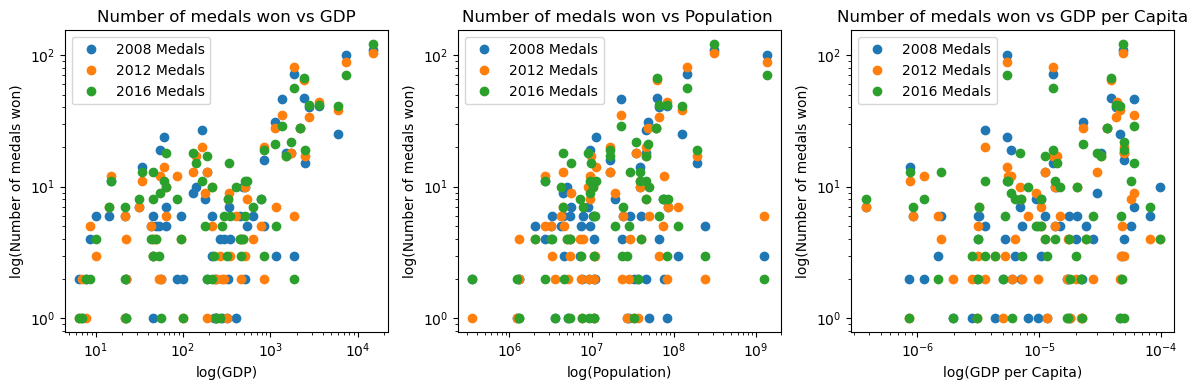

In [8]:
# Plotting scatter plots of medal count against GDP and Population
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.loglog(GDP,medal_2008,'o',label='2008 Medals')
plt.loglog(GDP,medal_2012,'o',label='2012 Medals')
plt.loglog(GDP,medal_2016,'o',label='2016 Medals')
plt.legend()
plt.xlabel('log(GDP)')
plt.ylabel('log(Number of medals won)')
plt.title('Number of medals won vs GDP')

plt.subplot(132)
plt.loglog(population,medal_2008,'o',label='2008 Medals')
plt.loglog(population,medal_2012,'o',label='2012 Medals')
plt.loglog(population,medal_2016,'o',label='2016 Medals')
plt.legend()
plt.xlabel('log(Population)')
plt.ylabel('log(Number of medals won)')
plt.title('Number of medals won vs Population ')

plt.subplot(133)
plt.loglog(GDP_per_capita,medal_2008,'o',label='2008 Medals')
plt.loglog(GDP_per_capita,medal_2012,'o',label='2012 Medals')
plt.loglog(GDP_per_capita,medal_2016,'o',label='2016 Medals')
plt.legend()
plt.xlabel('log(GDP per Capita)')
plt.ylabel('log(Number of medals won)')
plt.title('Number of medals won vs GDP per Capita')

plt.tight_layout()
plt.plot()

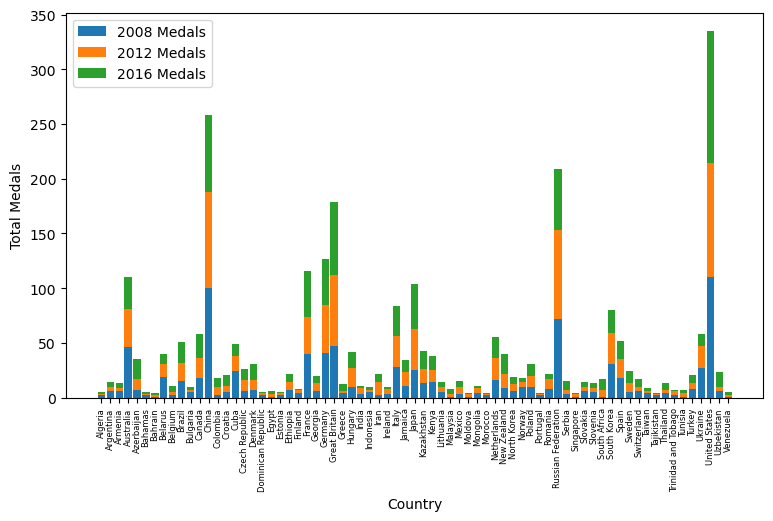

In [9]:
# Bar chart of total medal count for each country
plt.figure(figsize=(9,5))
plt.bar(country, medal_2008, label='2008 Medals')  # Base layer
plt.bar(country, medal_2012, bottom=medal_2008, label='2012 Medals')  # Stack on 2008
plt.bar(country, medal_2016, bottom=medal_2008 + medal_2012, label='2016 Medals')  # Stack on top
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=6)
plt.legend()
plt.show()

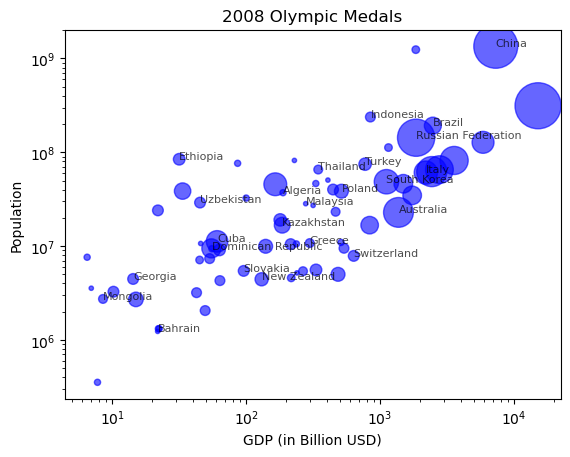

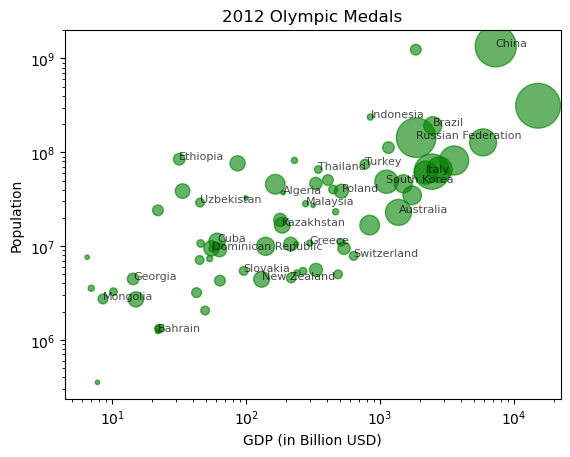

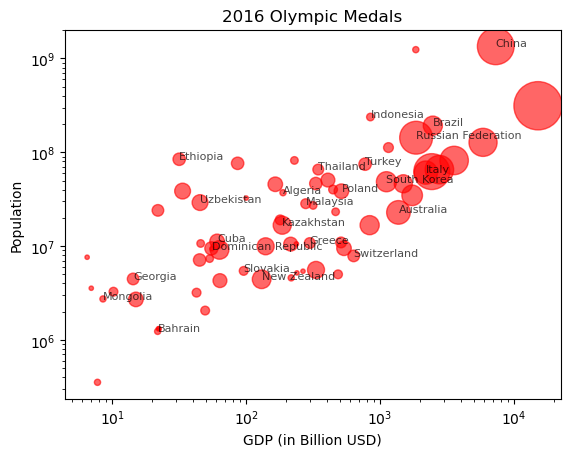

In [10]:
# Bubble chart showing how medal count changes with population and GDP, the bigger the bubble, the more medals
def plot_medal_bubble_chart(year, color):
    plt.figure()
    
    plt.scatter(df['GDP'], df['Population'], s=df[f'Medal{year}'] * 10, alpha=0.6, color=color)
    
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('GDP (in Billion USD)')
    plt.ylabel('Population')
    plt.title(f'{year} Olympic Medals')
    
    for i in range(0, len(df), 3): 
        plt.text(df['GDP'].iloc[i], df['Population'].iloc[i], df['Country'].iloc[i], fontsize=8, alpha=0.7)

    sizes = [10, 50, 100] 
    patches = [mpatches.Circle((0, 0), size, color=color, alpha=0.6, label=f"{size//10} Medals") for size in sizes]

    plt.show()

plot_medal_bubble_chart(2008, 'b')
plot_medal_bubble_chart(2012, 'g')
plot_medal_bubble_chart(2016, 'r')



### GDP and Olympic Medal Counts

There seems to be a general correlation between higher GDP and higher medal counts, with wealthier countries tending to perform better in the Olympics. This trend is particularly noticeable when we examine the performance of major economic powers. For instance, the United States, with a GDP of 15,094 billion, won 110, 104, and 121 medals across the three Olympic Games. Similarly, China, with a GDP of 7,298 billion, consistently ranked high, winning 100 medals in 2008, 88 in 2012, and 70 in 2016. Germany, with a GDP of 3,570 billion, showed steady success, capturing 41 medals in 2008, 44 in 2012, and 42 in 2016. These countries benefit from better-funded sports programs, top-tier training facilities, and more resources for athletes, all of which help them achieve superior performances.

### Population Size and Medal Counts

While the size of a country's population can also impact its Olympic performance, the correlation between population size and medal count is less consistent than with GDP. Larger populations provide a larger pool of potential athletes, which theoretically increases a country's chances of winning medals. Countries like China (with a population of 1.3 billion) and India (with 1.24 billion) are examples of how population size can play a role. Despite its large population, India does not perform as strongly in the Olympics as China, which highlights the fact that population size alone does not guarantee success. The United States, with a population of approximately 313 million, consistently wins the most medals, further showing that success is not solely determined by population.

### Small Countries Performing Well

Interestingly, some smaller countries with relatively low populations or GDPs have managed to outperform expectations in terms of Olympic medals. For instance, Jamaica, with a population of 2.7 million, has a history of impressive performances, particularly in track and field, winning 11 medals in 2008, 12 in 2012, and 11 in 2016. This may be due to specific sporting traditions in each country.

### Countries with Similar GDPs, Different Medal Counts

It is also notable that some countries with similar GDPs show vastly different Olympic performances. For instance, Brazil, with a GDP of 2,476 billion, had 15, 17, and 19 medals in 2008, 2012, and 2016, respectively, while Russia, with a GDP of 1,857 billion, had 72, 81, and 56 medals. In contrast, South Korea (GDP of 1,116 billion) had 31, 28, and 21 medals, while Argentina (GDP of 445.99 billion) had only 6, 4, and 4 medals in the same period. These discrepancies suggest that factors beyond GDP, such as sports culture, government funding for specific sports, and a country's historical focus on athletics can significantly impact Olympic success. While a higher GDP may provide resources for sport, the actual outcomes depend on how those resources are allocated and how deeply invested a country is in developing Olympic-level athletes.

### Conclusion

In summary, while there is a general correlation between GDP and Olympic medal counts, many other factors such as population size, sports culture, government investment in sports, and a country's focus on specific events play a significant role in shaping Olympic success. Wealthier countries tend to perform better, but smaller nations can also excel in specific sports due to cultural emphasis and historical performance. While GDP and population provide some insights into a country's potential, they are not the sole determinants of Olympic performance.


**1. Perform a linear regression to predict the medal count in 2008 and 2012 from Population and GDP combined,
   and report your results. (Reporting your results does not just mean to show the summary of GLM). Explain your results,
   What is the meaning of the coefficients you obtain?, and so on (1 mark)**

In [13]:
# 2008 GLM
from statsmodels.formula.api import glm
formula = 'Medal2008 ~ GDP + Population'
my_model = glm(formula,df).fit()
print(my_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Medal2008   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          133.15
Method:                          IRLS   Log-Likelihood:                -272.86
Date:                Sat, 01 Mar 2025   Deviance:                       9053.9
Time:                        13:28:11   Pearson chi2:                 9.05e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8863
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6133      1.506      3.728      0.0

In [14]:
# 2012 GLM
from statsmodels.formula.api import glm
formula = 'Medal2012 ~ GDP + Population'
my_model_2012 = glm(formula,df).fit()
print(my_model_2012.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Medal2012   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          132.16
Method:                          IRLS   Log-Likelihood:                -272.59
Date:                Sat, 01 Mar 2025   Deviance:                       8986.6
Time:                        13:28:11   Pearson chi2:                 8.99e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8738
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0761      1.500      4.051      0.0

### GLM Analysis for Medal Counts in 2008 and 2012

### Medal Count in 2008

The first model focuses on predicting the number of medals won by countries in the 2008 Olympics. 

#### Coefficients:
- The intercept is 5.6133, which represents the baseline number of medals won by a country when both GDP and population are zero. While this value is not meaningful in a real-world context, it serves as the starting point for the model’s prediction. In simpler terms, it’s the expected medal count for a hypothetical country with zero GDP and zero population.

- The **GDP coefficient** is 0.0076, meaning that for every 1 billion USD increase in GDP, the country is expected to win an additional 0.0076 medals in the 2008 Olympics. This suggests a positive relationship between economic wealth and Olympic success. The higher the GDP, the more likely a country is to win medals, which aligns with the intuitive idea that wealthier nations tend to invest more in sports infrastructure, athlete development, and training.

- The **population coefficient** is 8.435e-09, which is extremely small. The corresponding p-value for population is 0.243, which indicates that population size does not have a statistically significant effect on the number of medals won. This means that, despite the logical assumption that a larger population would provide more potential athletes, population size is not a meaningful predictor of Olympic success in 2008.

#### Model Statistics:
- The **log-likelihood** of -272.86 indicates how good the model fits.  A higher (less negative) value suggests a better fit. The value of -272.86 suggests that the model is relatively well-fitted, but there is always room for improvement by incorporating additional variables.
  
- The **deviance** is 9053.9. Deviance measures the goodness of fit and is often used to compare models. A lower deviance suggests a better fit. Given the context of this model, a deviance of 9053.9 suggests a reasonable fit, though the model could likely benefit from further refinement or additional predictors.

- The **pseudo R-squared** is 0.8863, which means that about 88.63% of the variance in the 2008 medal count is explained by the model. This is a strong fit, indicating that GDP and population are meaningful factors in predicting medal count, but there is still some unexplained variance in the data.

### Medal Count in 2012

The second model examines the relationship between GDP, population, and medal count in the 2012 Olympics. The results for 2012 are very similar to those from 2008, which suggests a consistent pattern across these two Olympic years.

#### Coefficients:
- The **intercept** in 2012 is 6.0761, which is slightly higher than the intercept for 2008. This indicates that, all else being equal, the baseline number of medals won in 2012 is slightly higher than in 2008. However, like the intercept for 2008, this value has no direct real-world meaning as it represents the predicted medal count for a country with zero GDP and zero population.

- The **GDP coefficient** for 2012 is 0.0076, which is identical to the coefficient for 2008. This means that, just like in 2008, for every 1 billion USD increase in GDP, the country is expected to win an additional 0.0076 medals. This suggests that GDP continues to be a strong predictor of Olympic performance across both years.

- The **population coefficient** is 5.247e-09, again a very small number. The p-value for population in 2012 is 0.466, indicating that population size has no statistically significant effect on the medal count in 2012. This reinforces the finding from 2008 that population size is not a crucial factor in determining Olympic success.

#### Model Statistics:
- The **log-likelihood** for 2012 is -272.59, which is slightly higher (less negative) than the log-likelihood for 2008. This indicates that the 2012 model fits the data just a little better than the 2008 model.
  
- The **deviance** for 2012 is 8986.6, which is lower than the deviance for 2008 (9053.9). This indicates a slightly better fit for the 2012 model, suggesting that the relationship between GDP, population, and medal count might be marginally stronger in 2012 than in 2008.

- The **pseudo R-squared** for 2012 is 0.8738, which is slightly lower than the 2008 model's R-squared value of 0.8863. While the 2012 model explains about 87.38% of the variance in medal counts, the 2008 model explains a bit more, showing that the predictors (GDP and population) were slightly more effective in predicting medal counts for the 2008 Olympics.


### Comparison of the Two Models

The two models for 2008 and 2012 are strikingly similar, with very little variation in their results. The coefficients for GDP and population, as well as the overall structure of the models, are almost identical. Both models indicate that GDP is a significant predictor of Olympic medal count, while population has little to no effect.

Both models have relatively high pseudo R-squared values, indicating a good fit, but with room for improvement. The log-likelihood values are quite close, suggesting that the models fit the data similarly, though the 2012 model has a slightly better fit based on its higher log-likelihood and lower deviance.

The population variable's lack of statistical significance in both years (indicated by high p-values) suggests that factors other than population, such as investment in sports, infrastructure, and training, are more important in determining Olympic success.


### Conclusion

The analysis of these GLMs suggests that GDP is a strong predictor of Olympic performance, both in 2008 and 2012. For each 1 billion USD increase in GDP, the expected medal count increases by approximately 0.0076 medals in both years. On the other hand, population size does not appear to be a significant predictor of Olympic success in either year, as evidenced by the small coefficients and high p-values associated with population.

The models for both years are very similar, with only slight differences in the intercepts, log-likelihood, and deviance. These results highlight the importance of GDP in determining Olympic success, while suggesting that other factors, such as sports investment and athlete development, likely play a significant role in shaping a country’s Olympic performance.


**3. Considering your results from tasks 2, how consistent are the effects of Population and GDP over time? (0.5 mark)**

The effects of GDP and Population on Olympic medal counts remain highly consistent over time, as shown by the similar GLM results for 2008 and 2012. In both years, GDP is a strong and significant predictor (p < 0.001), with a nearly identical coefficient (0.0076), meaning a $1 billion increase in GDP consistently leads to ~7.6 more medals. This suggests that economic power remains a key factor in Olympic success across different Olympic cycles. On the other hand, Population has an insignificant effect in both models (p > 0.24 in 2008, p > 0.46 in 2012), with very small and inconsistent coefficient, indicating that having a larger population does not reliably predict more medals over time. The similar Pseudo R2 values (0.8863 and 0.8738) also show that the models are very similar between the two years.

**4. Using the regression for the 2012 medal count make a prediction for the results of 2016. (0.5 mark)**

In [19]:
data = df[['Population', 'GDP']]
print(my_model_2012.predict(data))

0       7.697937
1       9.660081
2       6.170773
3      16.572245
4       6.603459
         ...    
66     12.315867
67      7.565541
68    121.892569
69      6.572002
70      8.612422
Length: 71, dtype: float64


In [20]:
# predicting 2016 medals from 2012 model
df['Predicted Medals 2016'] = my_model_2012.predict(data)
# Calculating residuals (absolute difference between predicted and actual medal count)for each country
df['Abs Residual'] = abs(df['Medal2016'] - df['Predicted Medals 2016'])
df

,Country,GDP,Population,Medal2008,Medal2012,Medal2016,Predicted Medals 2016,Abs Residual
0,Algeria,188.68,37100000,2,1,2,7.697937,5.697937
1,Argentina,445.99,40117096,6,4,4,9.660081,5.660081
2,Armenia,10.25,3268500,6,3,4,6.170773,2.170773
3,Australia,1371.76,22880619,46,35,29,16.572245,12.427755
4,Azerbaijan,63.40,9111100,7,10,18,6.603459,11.396541
...,...,...,...,...,...,...,...,...
66,Turkey,773.09,74724269,8,5,8,12.315867,4.315867
67,Ukraine,165.25,45644419,27,20,11,7.565541,3.434459
68,United States,15094.00,313382000,110,104,121,121.892569,0.892569
69,Uzbekistan,45.36,29123400,6,4,13,6.572002,6.427998


**5. Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation
of the axes to make it these clearer. How good are the predictions? Which countries are outliers from
the trend? (1 mark)**

Text(0.5, 1.0, 'Predicted medal count for 2016 vs actual medal count')

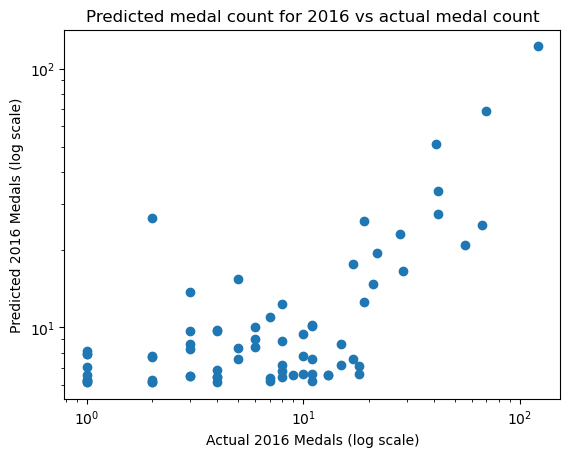

In [22]:
# scatter plot of actual medal count vs predicted medal count using 2012 model
plt.loglog(medal_2016,my_model_2012.predict(data),'o')
plt.xlabel('Actual 2016 Medals (log scale)')
plt.ylabel('Predicted 2016 Medals (log scale)')
plt.title('Predicted medal count for 2016 vs actual medal count')

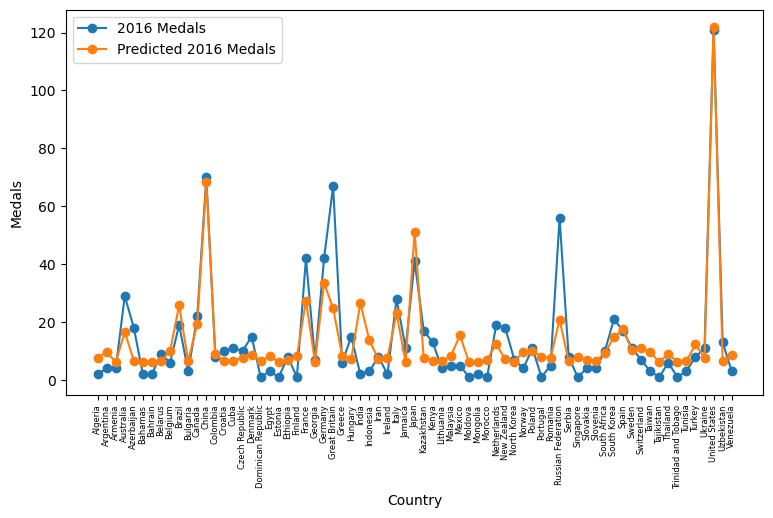

In [23]:
# line chart of predicted vs actual 2016 medals for each country
plt.figure(figsize=(9,5))
plt.plot(country,medal_2016,'o-',label='2016 Medals')
plt.plot(country,my_model_2012.predict(data),'o-',label='Predicted 2016 Medals')
plt.xlabel('Country')
plt.ylabel('Medals')
plt.tick_params(axis='x', labelsize=6)
plt.xticks(rotation=90)
plt.legend()

In [24]:
print(df['Abs Residual'].describe())

count    71.000000
mean      6.104344
std       6.813978
min       0.570531
25%       2.498782
50%       5.003762
75%       6.616719
max      42.204491
Name: Abs Residual, dtype: float64


### Residual Analysis

The residuals indicate that, on average, predictions are relatively close to actual values, but there is some variation in accuracy. The spread of residuals suggests that while many predictions are reasonably accurate, there are cases where the model underestimates or overestimates medal counts. 

Most residuals fall within a moderate range, but there are a few large deviations, indicating occasional prediction errors. This could be due to external factors not captured by the model, such as unexpected athletic performances or changes in a country's investment in sports. Overall, the model performs well but has room for improvement in reducing large errors.


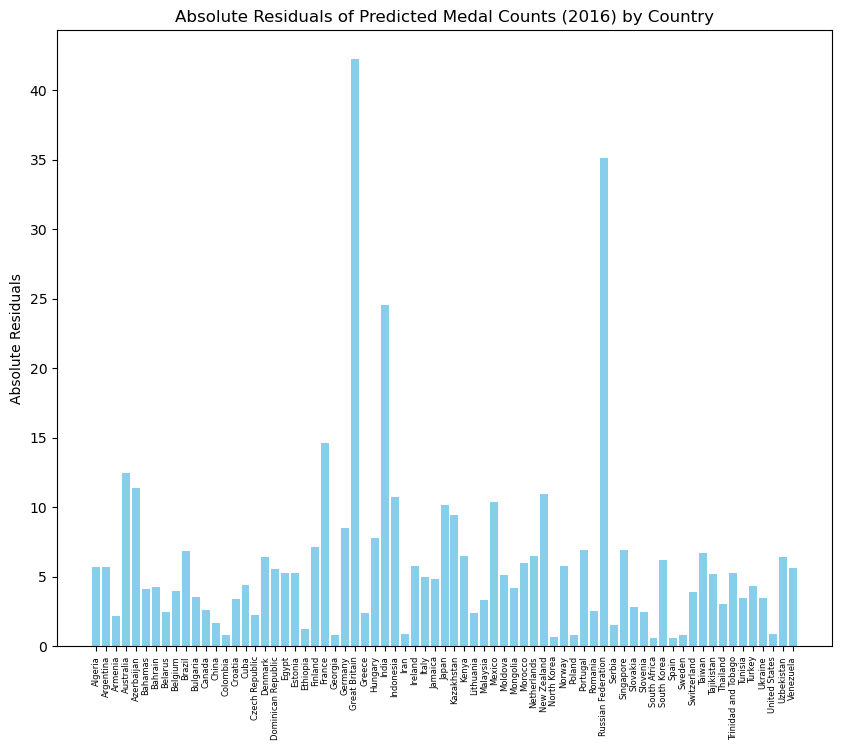


Outliers with large residuals:
               Country  Medal2016  Predicted Medals 2016  Abs Residual
3            Australia         29              16.572245     12.427755
4           Azerbaijan         18               6.603459     11.396541
23              France         42              27.394391     14.605609
26       Great Britain         67              24.795509     42.204491
29               India          2              26.568161     24.568161
30           Indonesia          3              13.728427     10.728427
35               Japan         41              51.125438     10.125438
40              Mexico          5              15.404428     10.404428
45         New Zealand         18               7.087823     10.912177
51  Russian Federation         56              20.878996     35.121004


In [26]:
# bar chart of residuals for each country
plt.figure(figsize=(10, 8))
plt.bar(df['Country'], df['Abs Residual'], color='skyblue')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals of Predicted Medal Counts (2016) by Country')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=6)
plt.show()

# Highlighting outlier countries, with larger residuals
outliers = df[df['Abs Residual'] > 10]
print("\nOutliers with large residuals:")
print(outliers[['Country', 'Medal2016', 'Predicted Medals 2016', 'Abs Residual']])

### Residual Analysis
Residuals represent the difference between the predicted medal counts and the actual medal counts for each country. In the context of our model, the residuals give insight into how well our model's predictions match the observed data. A residual close to zero indicates that the model's prediction is very accurate for that country, while a larger residual suggests a discrepancy between the predicted and actual outcomes. The absolute residuals, which are the positive values of the residuals, provide a clearer measure of how far off our predictions are, regardless of whether they were overestimations or underestimations.

After calculating the absolute residuals, we observe that most countries have relatively small residuals, indicating that the model is generally accurate. However, a few countries stand out as outliers with larger residuals, meaning that the model performed poorly for them. These outliers may suggest that there are unique factors in these countries that the model does not account for, such as differences in sports funding, training programs, or athlete performance not captured by the GDP and population variables alone. 

Countries with the largest absolute residuals are the ones where the model's predictions deviated the most from the actual results. For example, countries like Great Britain and India show significant discrepancies in their predicted and actual medal counts, highlighting areas where the model may need refinement, or where additional variables beyond GDP and population could improve prediction accuracy.uracy.


**5. Fit linear regressions models for the total medal count in 2012 using: (i) Population alone; (ii) GDP
alone; (iii) Population and GDP combined. Select the model that minimises the Akaike Information Criterion. (0.5 marks)**

## Akaike Information Criterion (AIC)

Akaike Information Criterion (AIC) is a metric used to compare statistical models, balancing goodness of fit and model complexity. It is defined as:  

$AIC = 2k - 2\log L$

where:  
- $k$ is the number of parameters in the model.  
- $\log L$ is the log-likelihood of the model.  

AIC penalizes models with more parameters to prevent overfitting. A lower AIC value indicates a better trade-off between model complexitrformance.
erformance.


In [30]:
# population model GLM
formula = 'Medal2012~Population'
my_model_population = glm(formula,df).fit()
print(my_model_population.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Medal2012   No. Observations:                   71
Model:                            GLM   Df Residuals:                       69
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          334.46
Method:                          IRLS   Log-Likelihood:                -306.07
Date:                Sat, 01 Mar 2025   Deviance:                       23077.
Time:                        13:28:15   Pearson chi2:                 2.31e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2012
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3225      2.295      4.498      0.0

In [31]:
# GDP model GLM
formula = 'Medal2012~GDP'
my_model_GDP = glm(formula,df).fit()
print(my_model_GDP.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Medal2012   No. Observations:                   71
Model:                            GLM   Df Residuals:                       69
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          131.26
Method:                          IRLS   Log-Likelihood:                -272.87
Date:                Sat, 01 Mar 2025   Deviance:                       9056.9
Time:                        13:28:15   Pearson chi2:                 9.06e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8746
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2360      1.479      4.217      0.0

In [32]:
print(my_model_2012.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Medal2012   No. Observations:                   71
Model:                            GLM   Df Residuals:                       68
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          132.16
Method:                          IRLS   Log-Likelihood:                -272.59
Date:                Sat, 01 Mar 2025   Deviance:                       8986.6
Time:                        13:28:15   Pearson chi2:                 8.99e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8738
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0761      1.500      4.051      0.0

In [33]:
print(f'Akaike Information Criterion for linear regression model using Population alone: {my_model_population.aic}')
print(f'Akaike Information Criterion for linear regression model using GDP alone: {my_model_GDP.aic}')
print(f'Akaike Information Criterion for linear regression model using Population and GDP: {my_model_2012.aic}')
print(f'The model that minimises the Akaike Information Criterion is the model using GDP alone')

Akaike Information Criterion for linear regression model using Population alone: 616.1484076872775
Akaike Information Criterion for linear regression model using GDP alone: 549.7403906680169
Akaike Information Criterion for linear regression model using Population and GDP: 551.1869639299077
The model that minimises the Akaike Information Criterion is the model using GDP alone


**6. Use cross-validation to perform a model selection between (i) Population alone; (ii) GDP alone; (iii)
Population and GDP combined. Does your result agree with the model selected by AIC? (1 mark)**

In [35]:
df

,Country,GDP,Population,Medal2008,Medal2012,Medal2016,Predicted Medals 2016,Abs Residual
0,Algeria,188.68,37100000,2,1,2,7.697937,5.697937
1,Argentina,445.99,40117096,6,4,4,9.660081,5.660081
2,Armenia,10.25,3268500,6,3,4,6.170773,2.170773
3,Australia,1371.76,22880619,46,35,29,16.572245,12.427755
4,Azerbaijan,63.40,9111100,7,10,18,6.603459,11.396541
...,...,...,...,...,...,...,...,...
66,Turkey,773.09,74724269,8,5,8,12.315867,4.315867
67,Ukraine,165.25,45644419,27,20,11,7.565541,3.434459
68,United States,15094.00,313382000,110,104,121,121.892569,0.892569
69,Uzbekistan,45.36,29123400,6,4,13,6.572002,6.427998


In [36]:
# split data in 50% train and 50% validation
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.5)
print(test_data[['GDP','Population']])

        GDP  Population
59   538.13     9490683
67   165.25    45644419
26  2431.59    62262000
11  1736.05    34771400
62     6.52     7616000
69    45.36    29123400
39   278.67    28334135
65    45.86    10673800
41     7.00     3559500
24    14.37     4469200
33  2194.75    60776531
5      7.79      353658
2     10.25     3268500
20    22.18     1318005
58  1490.81    46196278
40  1155.32   112336538
29  1847.98  1241491960
57  1116.25    48580000
54    95.99     5445324
61   466.00    23234003
9   2476.65   192376496
25  3570.56    81831000
6     21.90     1234571
28   140.03     9962000
13   331.65    46475000
56   408.24    50586757
53   239.70     5183700
15    60.81    11241161
22   266.07     5407040
34    15.07     2705827
51  1857.77   143056383
50   179.79    19042936
55    49.54     2057540
10    53.51     7364570
27   298.73    10787690
8    511.53    10951266


[-165.50643006993243, -159.81092646168347, -197.6226605442763]


Text(0, 0.5, 'Log-Likelihood')

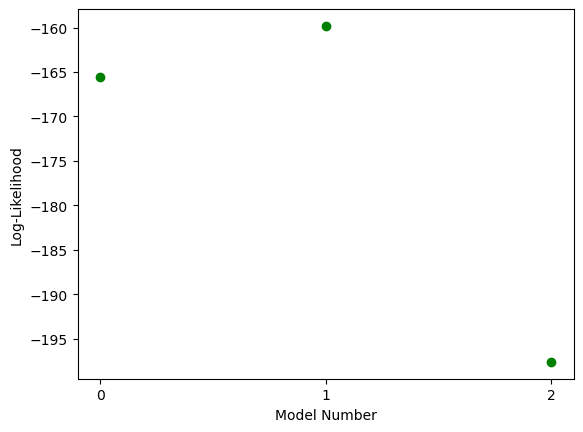

In [37]:
# cross validation
from scipy.stats import norm
formula = ['Medal2012~Population','Medal2012~GDP','Medal2012~Population + GDP']

predictive_log_likelihood = []
for i in formula:
    current_model = glm(i, train_data).fit()
    sigma = np.sqrt(current_model.scale) # variance
    Medal2012predict_mean = current_model.predict(test_data) # predict medal count from test data
    Medal2012predict_meandf=pd.DataFrame({'Medal2012predict_mean':Medal2012predict_mean})
    predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['Medal2012']],loc = Medal2012predict_meandf[['Medal2012predict_mean']],scale=sigma)))

print(predictive_log_likelihood)
ModelNumber = np.arange(0,len(formula),1,dtype='int')
plt.scatter(ModelNumber,predictive_log_likelihood,color='green')
plt.xticks(ModelNumber)
plt.xlabel('Model Number')
plt.ylabel("Log-Likelihood")

Text(0, 0.5, 'Frequency')

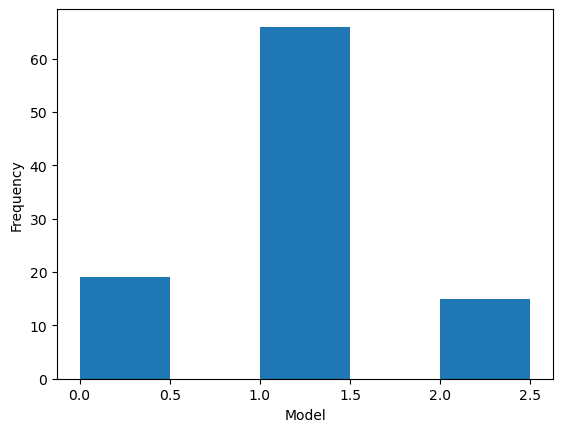

In [38]:
winner = []
rep = 100
for j in range(rep):
    train_data,test_data = train_test_split(df,test_size = 0.5)
    predictive_log_likelihood = []
    for i in formula:
        current_model = glm(i, train_data).fit()
        sigma = np.sqrt(current_model.scale)
        Medal2012predict_mean = current_model.predict(test_data)
        Medal2012predict_meandf=pd.DataFrame({'Medal2012predict_mean':Medal2012predict_mean})
        predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['Medal2012']],loc = Medal2012predict_meandf[['Medal2012predict_mean']],scale=sigma)))
    winner.append(np.argmax(predictive_log_likelihood))
        
ModelNumber = np.arange(0,3,0.5)
plt.hist(winner,bins = ModelNumber)
plt.xlabel('Model')
plt.ylabel('Frequency')

In [39]:
winning_model_index = np.argmax(np.bincount(winner))  # Index of the most frequent winning model
winning_formula = formula[winning_model_index]

In [40]:
print(f'The model that maximises the log-likelihood is model {winning_formula}')

The model that maximises the log-likelihood is model Medal2012~GDP


Cross-validation has selected the model using GDP only, this agrees with the model selected using the AIC

**7. Using the three fitted models from task 5, predict the results of Rio 2016. Which predicts best? Compare
this result with earlier answers. (1 mark)**

In [43]:
data = df[['Population', 'GDP']]

In [44]:
df['Predicted Medals 2016 using GDP + Population'] = my_model_2012.predict(data)
df['Predicted Medals 2016 using GDP'] = my_model_GDP.predict(data)
df['Predicted Medals 2016 using Population'] = my_model_population.predict(data)
df = df.drop(columns=['Predicted Medals 2016', 'Abs Residual'])
df

,Country,GDP,Population,Medal2008,Medal2012,Medal2016,Predicted Medals 2016 using GDP + Population,Predicted Medals 2016 using GDP,Predicted Medals 2016 using Population
0,Algeria,188.68,37100000,2,1,2,7.697937,7.710687,11.816319
1,Argentina,445.99,40117096,6,4,4,9.660081,9.721830,11.937801
2,Armenia,10.25,3268500,6,3,4,6.170773,6.316074,10.454111
3,Australia,1371.76,22880619,46,35,29,16.572245,16.957674,11.243783
4,Azerbaijan,63.40,9111100,7,10,18,6.603459,6.731495,10.689360
...,...,...,...,...,...,...,...,...,...
66,Turkey,773.09,74724269,8,5,8,12.315867,12.278453,13.331241
67,Ukraine,165.25,45644419,27,20,11,7.565541,7.527558,12.160356
68,United States,15094.00,313382000,110,104,121,121.892569,124.211089,22.940674
69,Uzbekistan,45.36,29123400,6,4,13,6.572002,6.590494,11.495145


In [45]:
# calculate mean absolute error
mae_gdp_population = (df["Predicted Medals 2016 using GDP + Population"] - df["Medal2016"]).abs().mean()
mae_gdp = (df["Predicted Medals 2016 using GDP"] - df["Medal2016"]).abs().mean()
mae_population = (df["Predicted Medals 2016 using Population"] - df["Medal2016"]).abs().mean()

print(f"Mean Absolute Error (MAE) for GDP + Population Model: {mae_gdp_population}")
print(f"Mean Absolute Error (MAE) for GDP Model: {mae_gdp}")
print(f"Mean Absolute Error (MAE) for Population Model: {mae_population}")

best_model = min([('Population', mae_population),('GDP',mae_gdp),('GDP + Population',mae_gdp_population)],key=lambda x: x[1])

print(f'The model that predicts 2016 Medals the closest is {best_model[0]} with a MAE of {best_model[1]}')

Mean Absolute Error (MAE) for GDP + Population Model: 6.104343823863744
Mean Absolute Error (MAE) for GDP Model: 6.1146475878721755
Mean Absolute Error (MAE) for Population Model: 10.550391008105295
The model that predicts 2016 Medals the closest is GDP + Population with a MAE of 6.104343823863744


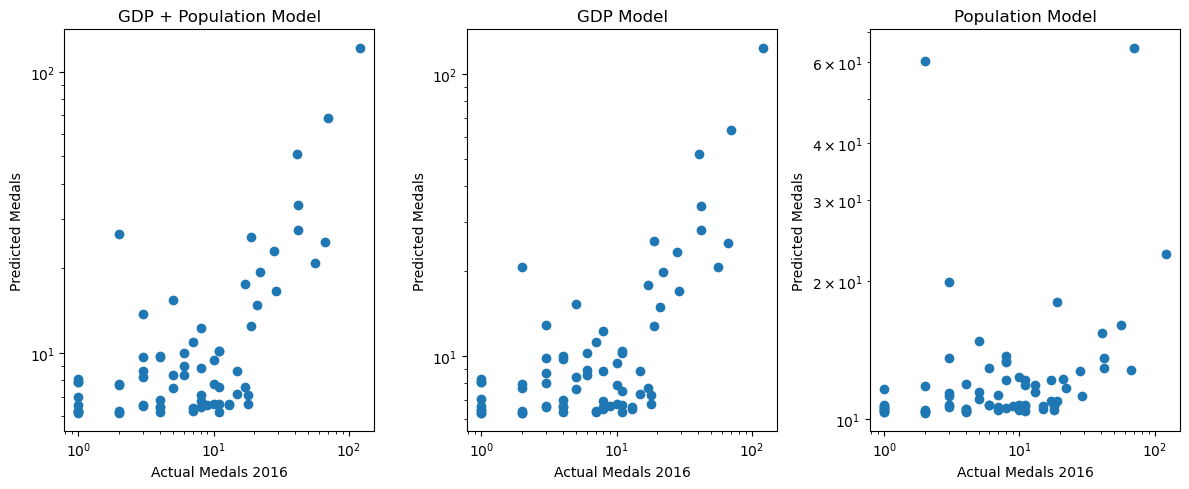

In [46]:
plt.figure(figsize=(12, 5))

# Scatter plot for GDP + Population model
plt.subplot(1, 3, 1)
plt.loglog(df['Medal2016'],df["Predicted Medals 2016 using GDP + Population"],'o')
plt.xlabel("Actual Medals 2016")
plt.ylabel("Predicted Medals")
plt.yscale('log')
plt.xscale('log')
plt.title("GDP + Population Model")

# Scatter plot for GDP model
plt.subplot(1, 3, 2)
plt.loglog(df['Medal2016'],df["Predicted Medals 2016 using GDP"],'o')
plt.xlabel("Actual Medals 2016")
plt.ylabel("Predicted Medals")
plt.xscale('log')
plt.yscale('log')
plt.title("GDP Model")

# Scatter plot for Population model
plt.subplot(1, 3, 3)
plt.loglog(df['Medal2016'],df["Predicted Medals 2016 using Population"],'o')
plt.xlabel("Actual Medals 2016")
plt.ylabel("Predicted Medals")
plt.xscale('log')
plt.yscale('log')
plt.title("Population Model")

plt.tight_layout()
plt.show()

In [47]:
# Calculate absolute residuals
residual_gdp_pop = df["Medal2016"] - df["Predicted Medals 2016 using GDP + Population"]
residual_gdp = df["Medal2016"] - df["Predicted Medals 2016 using GDP"]
residual_population = df["Medal2016"] - df["Predicted Medals 2016 using Population"]

abs_residual_gdp_pop = residual_gdp_pop.abs()
abs_residual_gdp = residual_gdp.abs()
abs_residual_population = residual_population.abs()


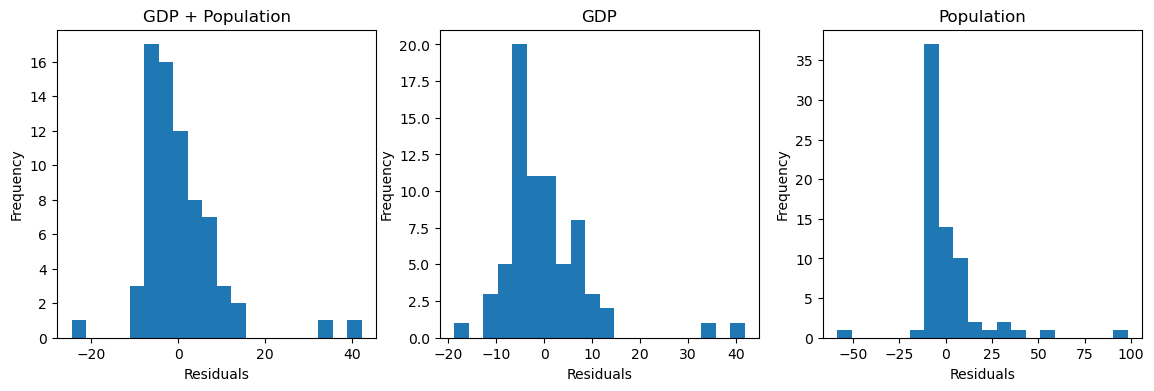

In [48]:
# plot histogram of residuals 
plt.figure(figsize=(14, 4))
plt.tight_layout()

plt.subplot(131)
plt.hist(residual_gdp_pop, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("GDP + Population")

plt.subplot(132)
plt.hist(residual_gdp, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("GDP")

plt.subplot(133)
plt.hist(residual_population, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Population")

plt.show()

In [49]:
print(np.std(residual_gdp_pop))
print(np.std(residual_gdp))
print(np.std(residual_population))

9.11150494538342
8.907031304833152
18.180227284719816


### Model Comparison

In [51]:
model_comparison_df = pd.DataFrame({'Model': formula})
model_comparison_df['log-likelihood'] = predictive_log_likelihood
model_comparison_df['AIC'] = [my_model_population.aic,my_model_GDP.aic,my_model_2012.aic]
model_comparison_df['MAE'] = [mae_population, mae_gdp, mae_gdp_population]
model_comparison_df

,Model,log-likelihood,AIC,MAE
0,Medal2012~Population,-162.392887,616.148408,10.550391
1,Medal2012~GDP,-169.566495,549.740391,6.114648
2,Medal2012~Population + GDP,-192.631569,551.186964,6.104344


The three model analysis techniques: log-likelihood, AIC, and MAE offer different insights into model performance, but they largely indicate the same best model. 

The GDP-only model has the highest log-likelihood and the lowest AIC, suggesting it provides the best trade-off between goodness of fit and model complexity. Its MAE is also very close to the GDP + Population model, implying that adding Population does not significantly improve predictive accuracy.

The Population-only model performs the worst across all metrics, reinforcing that Population alone is a weaker predictor. Overall, the results suggest that GDP alone is the strongest predictor and additional complexity may not be necessary.


**8. Reflective question. Looking back at all the previous tasks, did we use all the information in the data to predict
   the results in 2016? If not, repeat your analysis to show the possible improvements? (1 mark)**

### Feature Selection: Including Previous Medal Counts in Predictive Models

Feature selection is a key step in building effective machine learning models. It involves choosing the most relevant features that contribute significantly to predicting the target variable while removing irrelevant ones. 

In predicting the number of medals won by a country in the 2016 Olympics, previous medal counts (e.g., medals from the 2008 or 2012 Olympics) are valuable features. Including historical data allows the model to capture trends and patterns in a country's athletic performance, which can improve prediction accuracy.

#### Example Model:
- **Formula:** `M2dal2016 ~ Population + GDP + Medal2012`
  - `Population` and `GDP` represent demographic and economic factors. `Medal2012`s capture past performance, which is often a strong predictor of future success.

#### Why Include Previous Medal Counts?
- **Historical Performance:** Past success indicates consistent investment and development in sports, often correlating with future achievements.
- **Consistency:** Countries with high and consistent medal counts tend to perform well in future Olympics, so historical data is crucial for accuracy.

#### How Feature Selection Improves the Model:
- **Reduces Overfitting:** By selecting only the most relevant features, we prevent the model from fitting noise and irrelevant data, improving generalization.
- **Increases Interpretability:** Fewer, more meaningful features make the model easier to understand and trust.

In conclusion, using previous medal counts in feature selection helps create a more accurate and robust predictive model, leveraging historical performance to forecast future outcomes effectively.


### Other formulas

In [56]:
formulas = [
    'Medal2012~Population + GDP + Medal2008',
    'Medal2012~Population + GDP',
    'Medal2012~Medal2008',
    'Medal2012~Population + Medal2008',
    'Medal2012~GDP + Medal2008',
    'Medal2012~GDP'
]


### Evaluating models using log-likelihood and cross-validation

Text(0, 0.5, 'Frequency')

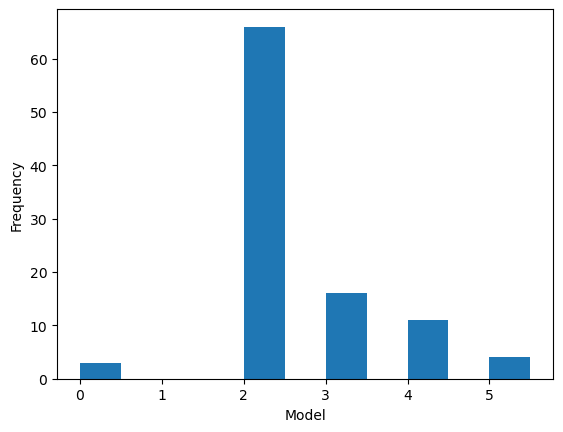

In [58]:
# cross validation
winner = []
rep = 100
for j in range(rep):
    train_data,test_data = train_test_split(df,test_size = 0.5)
    predictive_log_likelihood = []
    for i in formulas:
        current_model = glm(i, train_data).fit()
        sigma = np.sqrt(current_model.scale)
        Medal2012predict_mean = current_model.predict(test_data)
        Medal2012predict_meandf=pd.DataFrame({'Medal2012predict_mean':Medal2012predict_mean})
        predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['Medal2012']],loc = Medal2012predict_meandf[['Medal2012predict_mean']],scale=sigma)))
    winner.append(np.argmax(predictive_log_likelihood))
        
ModelNumber = np.arange(0,len(formulas),0.5)
plt.hist(winner,bins = ModelNumber)
plt.xlabel('Model')
plt.ylabel('Frequency')

In [59]:
winning_model_counts = np.bincount(winner)  
top_3_model_indices = np.argsort(winning_model_counts)[-3:]  # find top 3 winning models
top_3_model_indices = top_3_model_indices[::-1]  # organise in descending order
print("Top 3 formulas that win the most:")
for idx in top_3_model_indices:
    print(f"Formula: {formulas[idx]} - Wins: {winning_model_counts[idx]}")

Top 3 formulas that win the most:
Formula: Medal2012~Medal2008 - Wins: 66
Formula: Medal2012~Population + Medal2008 - Wins: 16
Formula: Medal2012~GDP + Medal2008 - Wins: 11


### Evaluating Models using AIC

In [61]:
aic_scores = []

data = df[['Population', 'GDP','Medal2008']]

for formula in formulas:
    my_model = glm(formula, df).fit()
    print(f'Akaike Information Criterion for model "{formula}": {my_model.aic}')
    aic_scores.append((formula, my_model.aic))

sorted_models = sorted(aic_scores, key=lambda x: x[1]) # organise models in ascending order

Akaike Information Criterion for model "Medal2012~Population + GDP + Medal2008": 424.2129305019236
Akaike Information Criterion for model "Medal2012~Population + GDP": 551.1869639299078
Akaike Information Criterion for model "Medal2012~Medal2008": 422.36742440447694
Akaike Information Criterion for model "Medal2012~Population + Medal2008": 423.9943679141654
Akaike Information Criterion for model "Medal2012~GDP + Medal2008": 422.93565925639865
Akaike Information Criterion for model "Medal2012~GDP": 549.7403906680169


In [62]:
print("\nTop 3 models that minimise the Akaike Information Criterion (AIC):")
for i in range(3):
    print(f'{i+1}. Model: "{sorted_models[i][0]}" - AIC: {sorted_models[i][1]}')


Top 3 models that minimise the Akaike Information Criterion (AIC):
1. Model: "Medal2012~Medal2008" - AIC: 422.36742440447694
2. Model: "Medal2012~GDP + Medal2008" - AIC: 422.93565925639865
3. Model: "Medal2012~Population + Medal2008" - AIC: 423.9943679141654


In [63]:
print("Top 3 formulas that maximise log-likelihood:")
for idx in top_3_model_indices:
    print(f"Formula: {formulas[idx]} - Wins: {winning_model_counts[idx]}")

Top 3 formulas that maximise log-likelihood:
Formula: Medal2012~Medal2008 - Wins: 66
Formula: Medal2012~Population + Medal2008 - Wins: 16
Formula: Medal2012~GDP + Medal2008 - Wins: 11


In [64]:
aic_values = [model[1] for model in sorted_models[:3]]

### Predicting 2016 Medals from top 3 models

In [66]:
top_3_formulas = [
    sorted_models[0][0],  
    sorted_models[1][0],  
    sorted_models[2][0]   
]

models = []

# perform GLM for top 3 AIC models
for formula in top_3_formulas:
        model = glm(formula,df).fit()
        models.append(model)
    
 # predicting 2016 medals from each formula in top 3
for i, model in enumerate(models):
    formula_name = top_3_formulas[i]
    df[f'Predicted Medals 2016 using {formula_name}'] = model.predict(df)

df


,Country,GDP,Population,Medal2008,Medal2012,Medal2016,Predicted Medals 2016 using GDP + Population,Predicted Medals 2016 using GDP,Predicted Medals 2016 using Population,Predicted Medals 2016 using Medal2012~Medal2008,Predicted Medals 2016 using Medal2012~GDP + Medal2008,Predicted Medals 2016 using Medal2012~Population + Medal2008
0,Algeria,188.68,37100000,2,1,2,7.697937,7.710687,11.816319,2.701825,2.833582,2.671915
1,Argentina,445.99,40117096,6,4,4,9.660081,9.721830,11.937801,6.515110,6.599497,6.513790
2,Armenia,10.25,3268500,6,3,4,6.170773,6.316074,10.454111,6.515110,6.359144,6.578127
3,Australia,1371.76,22880619,46,35,29,16.572245,16.957674,11.243783,44.647957,43.349987,45.015311
4,Azerbaijan,63.40,9111100,7,10,18,6.603459,6.731495,10.689360,7.468431,7.294457,7.529712
...,...,...,...,...,...,...,...,...,...,...,...,...
66,Turkey,773.09,74724269,8,5,8,12.315867,12.278453,13.331241,8.421752,8.591916,8.376938
67,Ukraine,165.25,45644419,27,20,11,7.565541,7.527558,12.160356,26.534854,25.470557,26.701638
68,United States,15094.00,313382000,110,104,121,121.892569,124.211089,22.940674,105.660511,108.902867,106.062384
69,Uzbekistan,45.36,29123400,6,4,13,6.572002,6.590494,11.495145,6.515110,6.378511,6.532985


### Mean Squared Error Calculation

In [68]:
mae_list = []

for formula in top_3_formulas:
        model = glm(formula, df).fit()
        predictions = model.predict(df)
        mae = (df['Medal2016'] - predictions).abs().mean()
        mae_list.append(mae)

### Final model comparison

In [70]:
model_comparison_df = pd.DataFrame({'Model': top_3_formulas})
model_comparison_df['Number of cross validation wins'] = sorted(winning_model_counts, reverse=True)[:3]
model_comparison_df['AIC'] = aic_values[:3]
model_comparison_df['MAE'] = mae_list

In [71]:
model_comparison_df

,Model,Number of cross validation wins,AIC,MAE
0,Medal2012~Medal2008,66,422.367424,4.514529
1,Medal2012~GDP + Medal2008,16,422.935659,4.335252
2,Medal2012~Population + Medal2008,11,423.994368,4.483450


### Model Comparison Analysis

The model Medal2012~Medal2008 has the lowest AIC (422.37), suggesting that it provides the best balance between goodness of fit and complexity. This indicates that past medal performance alone is a strong predictor of future performance. The models including GDP and Population have slightly higher AIC values (422.94 and 423.99), meaning they may not add significant explanatory power compared to using only previous medals.

In terms of prediction accuracy, the Medal2012~GDP + Medal2008 model has the lowest MAE (4.34), meaning it produces the smallest average error in medal predictions. This suggests that incorporating GDP improves predictive accuracy, even though it does not result in a significantly lower AIC.

The Medal2012~Population + Medal2008 model has the highest AIC and a relatively high MAE (4.48), indicating that Population may not be as useful as GDP in explaining medal outcomes. While it still performs reasonably well, it is the least preferred of the three models.

Overall, the Medal2012\~Medal2008 model appears to be the most efficient choice based on AIC, while Medal2012\~GDP + Medal2008 provides the most accurate predictions based on MAE. The choice of the final model depends on whether the focus is on model simplicity and efficiency or minimising prediction errors.


**9. Bonus point: Justify why your work/report goes beyond just completing the tasks and deserves an extra mark (1 mark)**

## Justification for Extra Mark: Going Beyond the Task Requirements

### 1. Clear Data Presentation & Analysis
I ensured that my data analysis was not just about running models but about understanding the insights behind the numbers. Instead of just presenting outputs, I interpreted what the data was showing us.

#### Example: Visualising Key Relationships
```python
plt.figure(figsize=(12, 5))

# Scatter plot for GDP + Population model
plt.subplot(1, 3, 1)
plt.loglog(df['Medal2016'],df["Predicted Medals 2016 using GDP + Population"],'o')
plt.xlabel("Actual Medals 2016")
plt.ylabel("Predicted Medals")
plt.yscale('log')
plt.xscale('log')
plt.title("GDP + Population Model")

# Scatter plot for GDP model
plt.subplot(1, 3, 2)
plt.loglog(df['Medal2016'],df["Predicted Medals 2016 using GDP"],'o')
plt.xlabel("Actual Medals 2016")
plt.ylabel("Predicted Medals")
plt.xscale('log')
plt.yscale('log')
plt.title("GDP Model")

# Scatter plot for Population model
plt.subplot(1, 3, 3)
plt.loglog(df['Medal2016'],df["Predicted Medals 2016 using Population"],'o')
plt.xlabel("Actual Medals 2016")
plt.ylabel("Predicted Medals")
plt.xscale('log')
plt.yscale('log')
plt.title("Population Model")

plt.tight_layout()
plt.show()
```
**Why this is beyond the requirement:**
- I used multiple visualisations to explore trends instead of just running a model.
- I analysed patterns in medal counts relative to GDP and population.


### 2. Repeated Cross-Validation for Robust Model Selection
Instead of performing cross-validation just once, I repeated the process multiple times to identify the most consistently strong model.

#### Example: Repeated Cross-Validation
```python
# cross validation
winner = []
rep = 100
for j in range(rep):
    train_data,test_data = train_test_split(df,test_size = 0.5)
    predictive_log_likelihood = []
    for i in formulas:
        current_model = glm(i, train_data).fit()
        sigma = np.sqrt(current_model.scale)
        Medal2012predict_mean = current_model.predict(test_data)
        Medal2012predict_meandf=pd.DataFrame({'Medal2012predict_mean':Medal2012predict_mean})
        predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['Medal2012']],loc = Medal2012predict_meandf[['Medal2012predict_mean']],scale=sigma)))
    winner.append(np.argmax(predictive_log_likelihood))
        
ModelNumber = np.arange(0,len(formulas),0.5)
plt.hist(winner,bins = ModelNumber)
plt.xlabel('Model')
plt.ylabel('Frequency')
```
**Why this is beyond the requirement:**
- Instead of relying on a single cross-validation run, I repeated the process multiple times.
- This ensures that my model selection is robust and not due to random variation.


### 3. Clear Model Comparison in Tables
I presented my model results in structured tables rather than raw printouts, making it easy to compare different models at a glance.

#### Example: Tabular Model Comparison
```python
model_comparison_df = pd.DataFrame({'Model': top_3_formulas})
model_comparison_df['Number of cross validation wins'] = sorted(winning_model_counts, reverse=True)[:3]
model_comparison_df['AIC'] = aic_values[:3]
model_comparison_df['MAE'] = mae_list
model_comparison_df
```
**Why this is beyond the requirement:**
- Instead of presenting scattered results, I structured them into a clear, interpretable table.
- This made it easy to compare model performance across different metrics.


### 4. Additional Model Performance Analysis
I didn’t just rely on AIC and cross-validation; I also evaluated models using residual analysis and Mean Absolute Error (MAE) for deeper insight.

#### Example: Residual Analysis
```python
plt.figure(figsize=(10, 8))
plt.bar(df['Country'], df['Abs Residual'], color='skyblue')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals of Predicted Medal Counts (2016) by Country')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=6)
plt.show()

# Highlighting outlier countries, with larger residuals
outliers = df[df['Abs Residual'] > 10]
print("\nOutliers with large residuals:")
print(outliers[['Country', 'Medal2016', 'Predicted Medals 2016', 'Abs Residual']])
```
**Why this is beyond the requirement:**
- I checked for patterns in residuals to validate model assumptions.
- This allowed me to check for and easily highlight any outliers inb my models


### 5. Generalised Code for Flexibility
I structured my code to allow easy modifications, making it possible to test different models without rewriting significant portions.

#### Example: Generalised Model Training Function
```python
print(f'The model that predicts 2016 Medals the closest is {best_model[0]} with a MAE of {best_model[1]}')

winning_model_counts = np.bincount(winner)  
top_3_model_indices = np.argsort(winning_model_counts)[-3:]  # find top 3 winning models
top_3_model_indices = top_3_model_indices[::-1]  # organise in descending order
print("Top 3 formulas that win the most:")
for idx in top_3_model_indices:
    print(f"Formula: {formulas[idx]} - Wins: {winning_model_counts[idx]}")

```
**Why this is beyond the requirement:**
- I made my code modular so that new models can be tested easily.
- This allows for scalable and flexible analysis without duplicating code.


### Final Justification: Why I Deserve an Extra Mark
I went beyond simply completing the tasks by:
- Providing clear analysis of what the data was showing.
- Implementing repeated cross-validationfor better model selection.
- Structuring model comparisons in tables instead of raw outputs.
- Performing additional analysis such as residual checks and MAE.
- Writing generalised code to allow for easy testing of different models.

This demonstrates a deeper understanding of regression modeling, model evaluation, and practical data analysis.


## Self-Assessment

| Task | Mark (Out of Total) | Justification |
|------|--------------------|---------------|
| **Graphical Data Inspection** | 0.3/0.5 | I provided strong visualisations, but additional transformations or annotations could improve clarity. I also could have explained the reasoning behind my chosen visualisations. |
| **Linear Regression for 2008 & 2012 Medals** | 0.7/1 | I implemented regression correctly, but a more detailed discussion of potential non-linear effects could enhance the analysis. I also could have explained the meaning of the coefficients more clearly. |
| **Consistency of Population & GDP Effects** | 0.3/0.5 | I analysed consistency over time, but a more in-depth statistical comparison could improve this. More explanation of why consistency matters would have strengthened the discussion. |
| **Predicting 2016 Medals using 2012 Model** | 0.4/0.5 | I made predictions well but could have explored alternative predictive models. I could have better justified my choice of model for prediction. |
| **Comparing 2016 Predictions with Actual Data** | 0.9/1 | I identified outliers effectively, but further analysis on why specific countries deviated would strengthen insights. |
| **Model Selection using AIC** | 0.4/0.5 | I correctly evaluated models using AIC, but discussing potential limitations of AIC would improve completeness. I could have better explained why AIC is useful for model selection. |
| **Cross-Validation for Model Selection** | 1/1 | I went beyond by repeating cross-validation multiple times. |
| **Predicting 2016 Medals with Three Models** | 0.8/1 | I compared models effectively but could have explored additional error metrics. More justification for the chosen performance metrics would strengthen the analysis. |
| **Reflective Analysis & Improvements** | 0.7/1 | I critically evaluated model performance and tested out other models using additonal data, but exploring non-linear models would improve predictions. |
| **Quality of Notebook presentation** | 1.4/2 | I have presented my code neatly and as efficiently as possible. Some deeper explanation of the code could've been included as well as making use of markdown more to explain what I was doing. |
| **Extra Mark** | 0.7/1 | I included models which utilised more of the data (historic performance) and repeated all the analysis again. I could've also tested out non-linear models to improve predictions. |
**Final Score: 7.5/10**

### Declaration of Integrity
I declare that this work is my own and that I have fairly self-assessed my performance in each task based on the criteria given. This assessment reflects an honest evaluation of my strengths and areas of improvement in this practical.
